In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [36]:
import sqlite3

with sqlite3.connect("../db.sqlite3") as conn:
    query = """
        SELECT o.*, oi.*, p.*
        FROM restaurant_order AS o
        JOIN restaurant_orderitem AS oi ON o.id = oi.order_id
        JOIN restaurant_product AS p ON oi.product_id = p.id
    """
    combined_df = pd.read_sql_query(query, conn)

combined_df.to_csv("combined_data.csv", index=False)

print(combined_df.head())
print(len(combined_df))

   id             datetime  id  quantity  order_id  product_id   id  price  \
0   1  2019-08-03 20:25:00   1         2         1           6    6   0.80   
1   1  2019-08-03 20:25:00   2         1         1         240  240  12.95   
2   1  2019-08-03 20:25:00   3         1         1          19   19   2.95   
3   1  2019-08-03 20:25:00   4         1         1          36   36   3.95   
4   1  2019-08-03 20:25:00   5         1         1         111  111   8.95   

                  name  
0        Plain Papadum  
1     King Prawn Balti  
2          Garlic Naan  
3        Mushroom Rice  
4  Paneer Tikka Masala  
74818


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

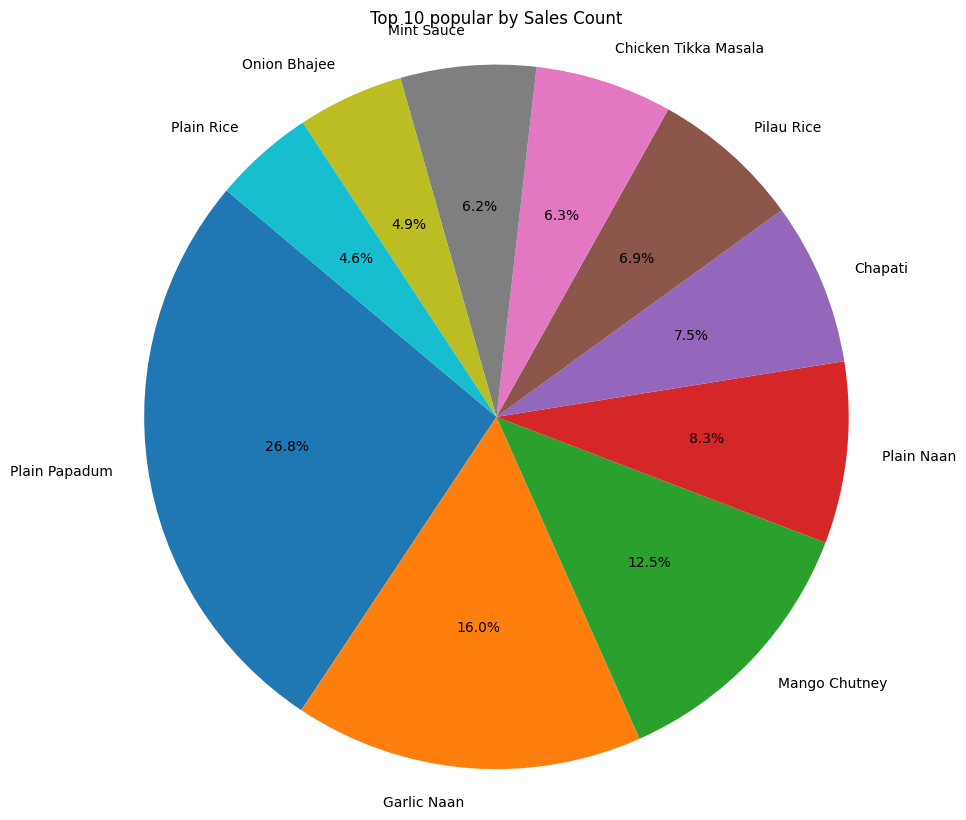

In [42]:
product_sales = df.groupby("product_id")["quantity"].sum()
top_10_products = product_sales.sort_values(ascending=False).head(10)
popularity_percentages = (top_10_products / top_10_products.sum()) * 100
product_names = df[df["id"].isin(top_10_products.index)]["name"].dropna().drop_duplicates()

plt.figure(figsize=(10, 10))
plt.pie(popularity_percentages, labels=product_names, autopct="%1.1f%%", startangle=140)
plt.title("Top 10 popular by Sales Count")
plt.axis("equal")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

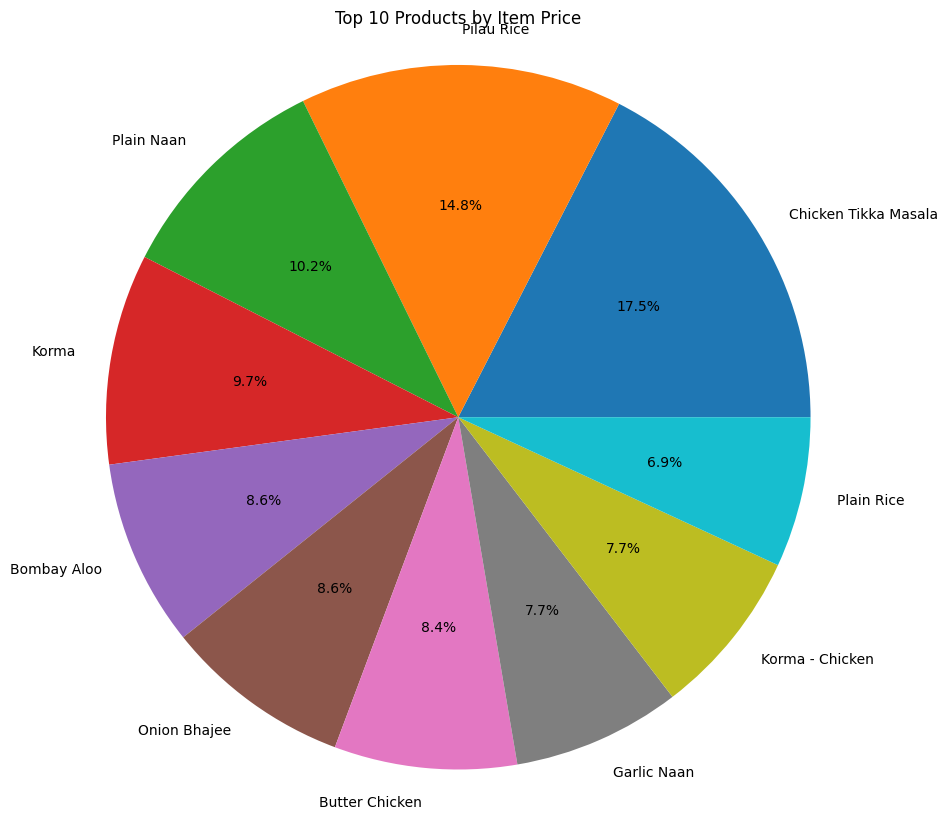

In [41]:
df['Item Price'] = df['price'] * df['quantity']
product_sales = df.groupby('name')['Item Price'].sum()
top_10_products = product_sales.nlargest(10)
total_sales = top_10_products.sum()
top_10_products_percentage = (top_10_products / total_sales) * 100

plt.figure(figsize=(10, 10))
plt.pie(top_10_products_percentage, labels=top_10_products.index, autopct='%1.1f%%')
plt.title('Top 10 Products by Item Price')
plt.axis('equal')
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

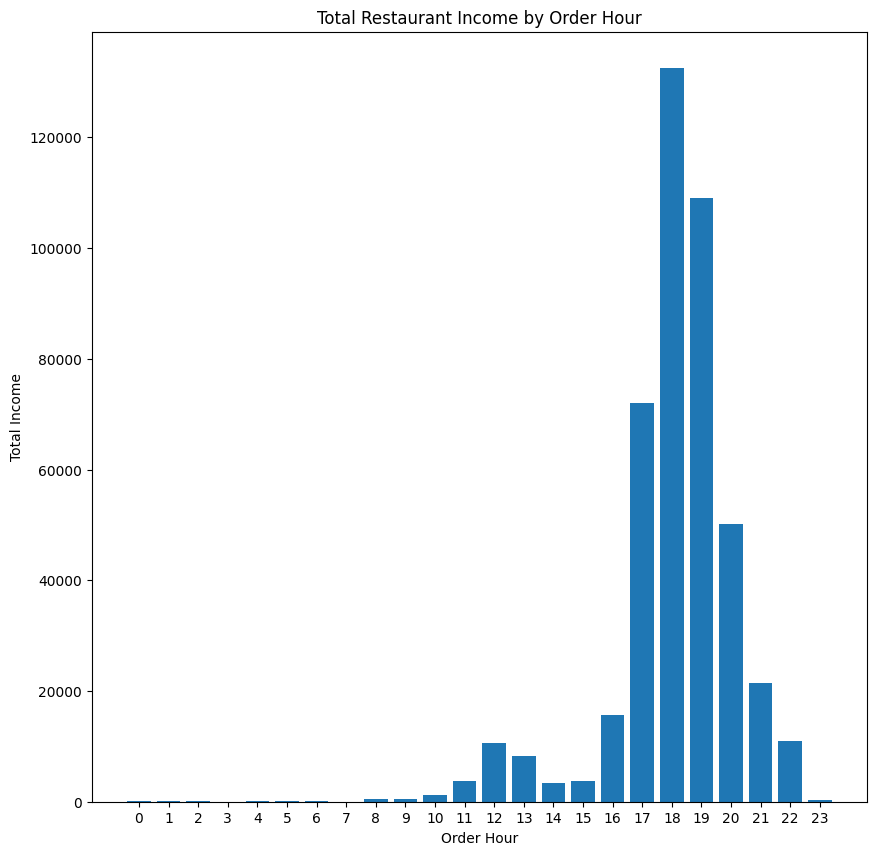

In [39]:
df['Order Datetime'] = pd.to_datetime(df['datetime'])
df['Order Hour'] = df['Order Datetime'].dt.hour

hourly_income = df.groupby('Order Hour')['Item Price'].sum()

plt.figure(figsize=(10, 10))
plt.bar(hourly_income.index, hourly_income.values)
plt.xlabel('Order Hour')
plt.ylabel('Total Income')
plt.title('Total Restaurant Income by Order Hour')
plt.xticks(range(24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

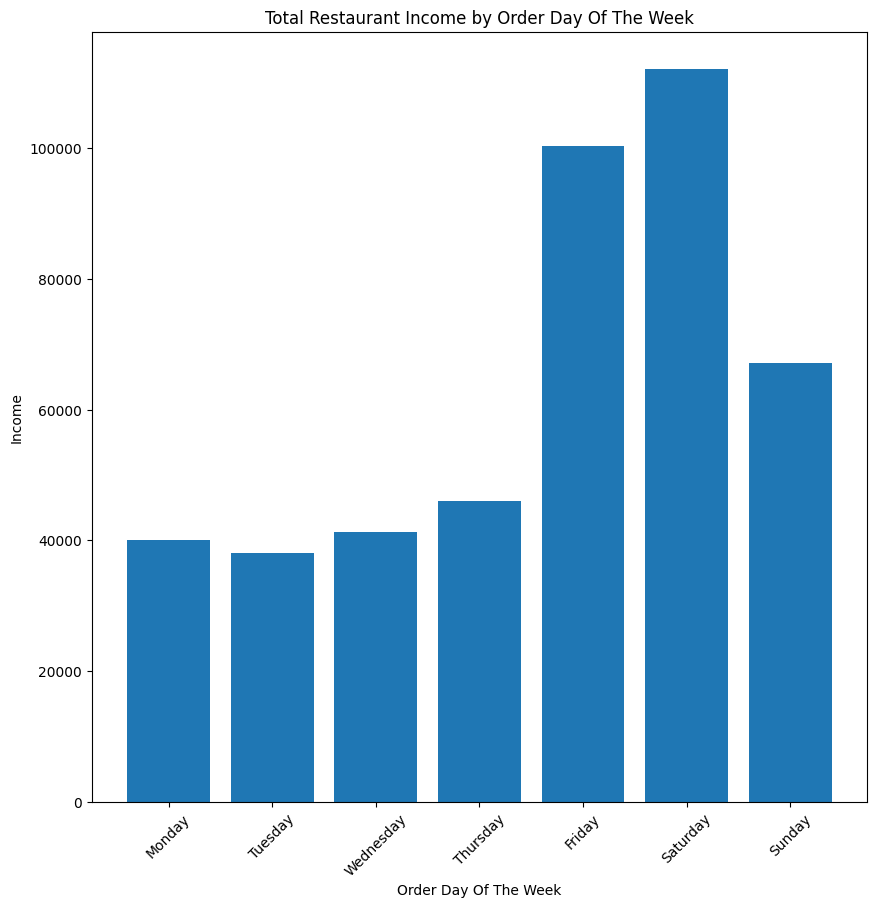

In [40]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['Order Day Of The Week'] = df['datetime'].dt.dayofweek

daily_income = df.groupby('Order Day Of The Week')['Item Price'].sum()

plt.figure(figsize=(10, 10))
plt.bar(daily_income.index, daily_income.values)
plt.xlabel('Order Day Of The Week')
plt.ylabel('Income')
plt.title('Total Restaurant Income by Order Day Of The Week')
plt.xticks(range(7), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=45)
plt.show()